In [153]:
import pandas as pd

In [154]:
stats_fhe = pd.read_csv('./stats_FHEDecisionTreeClassifier.csv')
stats = pd.read_csv('./stats_DecisionTreeClassifier.csv')
stats.drop_duplicates(subset=["max_depth", "n_features", "n_bits"], inplace=True)

In [155]:
stats

,Unnamed: 0,model,max_depth,n_bits,n_features,training_time,compilation_time,prediction_time,accuracy,f1
0,0,DecisionTreeClassifier,3,2,5,0.001409,0,0.000109,0.904,0.908397
1,1,DecisionTreeClassifier,3,2,6,0.001602,0,0.000120,0.892,0.891566
2,2,DecisionTreeClassifier,3,2,7,0.001690,0,0.000065,0.868,0.874525
3,3,DecisionTreeClassifier,3,2,8,0.001827,0,0.000065,0.888,0.887097
4,4,DecisionTreeClassifier,3,2,9,0.002269,0,0.000100,0.900,0.889868
...,...,...,...,...,...,...,...,...,...,...
3310,3310,DecisionTreeClassifier,19,14,15,0.008404,0,0.000132,1.000,1.000000
3311,3311,DecisionTreeClassifier,19,14,16,0.007567,0,0.000161,1.000,1.000000
3312,3312,DecisionTreeClassifier,19,14,17,0.008343,0,0.000106,1.000,1.000000
3313,3313,DecisionTreeClassifier,19,14,18,0.007974,0,0.000110,1.000,1.000000


In [156]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

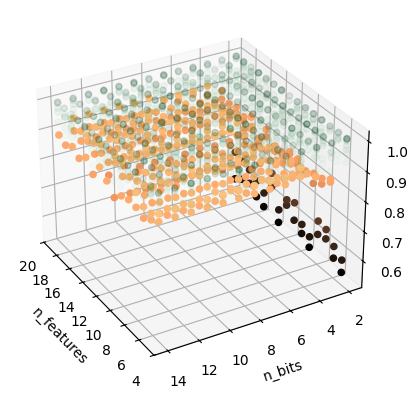

In [167]:
from matplotlib.ticker import MaxNLocator
fig = plt.figure()
ax = plt.axes(projection='3d')
X = stats_fhe['n_features']
Y = stats_fhe['n_bits']
Z = stats_fhe['f1']
ax.set_xlabel('n_features')
ax.scatter3D(X, Y, Z, c=Z, cmap='copper', alpha=1.0)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
sample = stats.sample(frac=0.5)
X = sample['n_features']
Y = sample['n_bits']
Z = sample['f1']
ax.set_ylabel('n_bits')
ax.set_zlabel('F1');
ax.view_init(30, 150)
ax.scatter3D(X, Y, Z, c=Z, cmap='Greens', alpha=0.05)

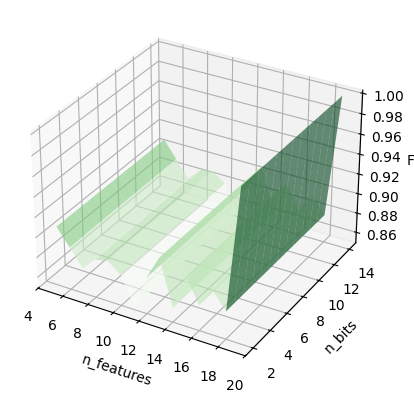

In [158]:
from matplotlib.ticker import MaxNLocator
import numpy as np
fig = plt.figure()
ax = plt.axes(projection='3d')
X = stats['n_features']
Y = stats['n_bits']
Z = stats['f1']
# Create a grid for the surface plot
X_grid, Y_grid = np.meshgrid(np.unique(X), np.unique(Y))
Z_grid = np.array([np.interp(X_grid[i], X, Z) for i in range(len(Y_grid))])

# Plot the surface
ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='Greens', alpha=0.6)

# Scatter plot
#ax.scatter3D(X, Y, Z, c=Z, cmap='Greens', alpha=0.5)
ax.set_xlabel('n_features')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_ylabel('n_bits')
ax.set_zlabel('F1');